# `Python` в науке и инженерии

## Домашнее задание 3. `Scipy`

Правила выполнения работы:

- Решение каждой задачи должно располагаться в **ячейке типа "Код" под ячейкой с условием задачи**
- **Результат** каждой задачи должен быть **выведен на экран**
- **Запрещено** изменять ячейки с условиями задач каким-либо образом и перемещать их
- Все задачи должны быть решены с использованием **векторизации**
- Если в условии задачи не сказано иное, **не допускается** применение циклов `for`, `while`, генераторов списков и любых других циклов и их заменителей, не входящих в `numpy`
- **В квадратных скобках** в конце условия задачи указано **количество баллов** за корректное выполнение этой задачи


Полезные документы:

- [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [Scientific Python Lectures / Numpy](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

**1. Импортировать: [5]**

- модуль `numpy` под именем `np`

- подмодуль `pyplot` из модуля `matplotlib` под именем `plt`

- из модуля `scipy.interpolate` функции `interp1d`, `InterpolatedUnivariateSpline`

- из модуля `scipy.optimize` функции `root`, `minimize`

- из модуля `scipy.integrate` функции `solve_ivp`

In [20]:
import numpy as np
import matplotlib as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy.optimize import root, minimize
from scipy.integrate import solve_ivp

**2. Построить интерполяционные сплайны 0, 1, 2, 3 степеней для функции, заданной таблично. Изобразить исходную функцию точками, а построенные сплайны линиями разных цветов на одном рисунке; подписать каждую линию и вывести легенду. [10]**

`x    = [0.    ,  0.007,  0.014,  0.021,  0.028,  0.035,  0.042,  0.049]`

`f(x) = [68.041, 37.183, 55.324, 47.556, -0.739, 48.188, 59.159, 19.636]`



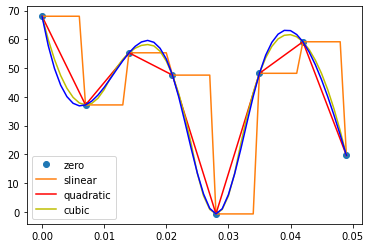

In [21]:
x = [0. , 0.007, 0.014, 0.021, 0.028, 0.035, 0.042, 0.049]
y = [68.041, 37.183, 55.324, 47.556, -0.739, 48.188, 59.159, 19.636]
f0 = interp1d(x, y, kind = 'zero')
f1 = interp1d(x, y, kind = 'slinear')
f3 = interp1d(x, y, kind = 'cubic')
f2 = interp1d(x, y, kind = 'quadratic')
r =np.linspace(0 , 0.049, 50)
plt.pyplot.plot(x,y,'o', r, f0(r), '-', r, f1(r), 'r', r, f2(r), 'y', r, f3(r), 'b')

plt.pyplot.legend(['zero', 'slinear', 'quadratic', 'cubic'])
plt.pyplot.show() 




**3. Кривая на плоскости задана таблично (массивом точек) в файле `curve.txt`. Построить сплайн 3 порядка и изобразить его на рисунке вместе с исходными точками. [10]**

Для построения сплайна рекомендуется преобразовать координаты кривой в полярную систему координат.

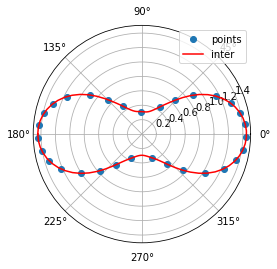

In [22]:
curve = np.loadtxt('curve.txt')
arr = curve.reshape(curve.size, 1)
center = np.mean(curve, axis=0)
def to_polar(points, center):
  centered = points - center
  a = np.arctan2(centered[:,1], centered[:,0])
  r = np.linalg.norm(centered, axis=1)
  return np.column_stack((a, r))
orb = to_polar(curve, center)
arr1 = np.argsort(orb[:, 0])
orb = orb[arr1]
f = interp1d(orb[:, 0], orb[:,1], kind='cubic', fill_value='extrapolate')
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = f(x1)
plt.pyplot.polar(orb[:, 0], orb[:,1], 'o', x1, y1, 'r')
plt.pyplot.legend(['points', 'inter'])


**4. Найти все корни и экстремумы функции $f(x) = \log(x) \cdot \cos(x)$ на отрезке $[1, 20]$ численным методом. Построить график функции и отметить на нем найденные корни и экстремумы [10]**


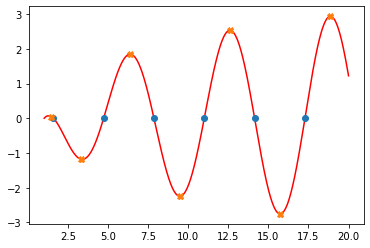

In [23]:
from scipy import optimize
x = np.linspace(1,20,500)
def f(x):
  return np.log(x)*np.cos(x)
y = f(x)
from scipy.interpolate import InterpolatedUnivariateSpline
s = InterpolatedUnivariateSpline(x, y, k=3)
r = s.roots()

xnew = np.linspace(1,20,1000)
plt.pyplot.plot(xnew, s(xnew), 'r')
ry = f(r)
plt.pyplot.plot(r, ry, 'o')

from scipy.misc import derivative 
yder =  derivative(s, x[:], n=1) 
s1 = InterpolatedUnivariateSpline(x, yder, k=3)
rder = s1.roots()
y1 = f(rder)
plt.pyplot.plot(rder, y1, 'X')





**5. Численным методом найти все корни и экстремумы периодической функции, заданной параметрически (кривая в трехмерном пространстве); изобразить трехмерный график функции и отметить на нем корни и экстремумы [15]**

Параметрическое задание функции:

$\begin{cases}
x = \cos(t) \\
y = \sin(t) \\
z = \cos(4t) \cdot \sin(2t) \\
\end{cases}$

Корни функции задаются уравнением $z = 0$



[-2.32006915 -0.78539816  0.78539816  2.32006915]


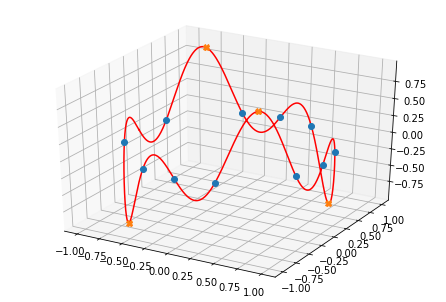

In [24]:
def x(t):
  return np.cos(t)
def y(t):
  return np.sin(t)
def z(t):
  return (np.cos(4*t)*np.sin(2*t))
t = np.linspace(-np.pi,np.pi,1000)
from scipy.interpolate import InterpolatedUnivariateSpline
x1 = x(t)
y1 = y(t)
z1 = z(t)
tnew = np.linspace(-np.pi, np.pi,1000)
s1 = InterpolatedUnivariateSpline(t, x1, k=3)
s2 = InterpolatedUnivariateSpline(t, y1, k=3)
s3 = InterpolatedUnivariateSpline(t, z1, k=3)
troots = s3.roots()
xr = x(troots) 
yr = y(troots)
zr = z(troots)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig=plt.figure()
ax=Axes3D(fig)
ax.plot(s1(t) , s2(t), s3(t), 'r')
ax.plot(xr, yr, zr, 'o')


yder =  derivative(s3, t[:], n=1) 

s4 = InterpolatedUnivariateSpline(t, yder, k=3)
rder = s4.roots()
print(rder)
xder = s1(rder)
yder = s2(rder) 
zder = s3(rder)
plt.plot(xder,yder, zder,'X')


**6. Построить 10 фазовых траекторий $\dot x(x), \dot y(y)$, а также зависимостей $y(x)$ для задачи "хищник-жертва"; подписать оси [15]**

Задача "хищник-жертва" описывается моделью Лотки-Вольтерры:

$\begin{cases}
\dot x = \alpha x - \beta x y \\
\dot y = \delta x y - \gamma y \\
\end{cases}$

где $x$ - количество жертв, $y$ - количество хищников.

Параметры модели взять следующими: $\alpha = 2/3, \beta = 4/3, \gamma = \delta = 1$

Начальные условия взять на линии $y = x$ на отрезке $[0.1, 1.1]$.

Отрезок интегрирования $t \in [0, 15]$.

**7. Рассчитать и построить график зависимости периода колебаний математического маятника от начальной скорости на полуинтервале (2, 10] [15]**

В этой задаче разрешается использовать один цикл `python`.

Уравнения движения (ОДУ) математического маятника:

$\begin{cases}
\dot \theta = \omega \\
\dot \omega = - \sin(\theta) \\
\end{cases}$

Способ решения задачи:
- взять 100 значений $\omega_0 \in (2, 10]$
- для каждого вектора состояния (0, $\omega_0$) проинтегировать ОДУ на отрезке времени $t \in [0, 2 \pi]$
- по полученной таблично функции $\theta(t)$ построить сплайн для $\theta(t) - 2 \pi$ и найти его корень $T$
- нарисовать график $T(\omega_0)$ 

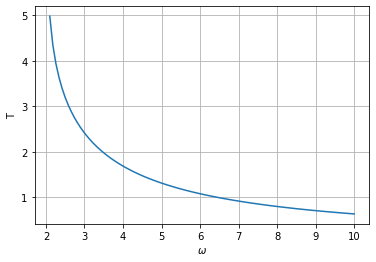

In [27]:
def f(t, s):
    theta, omega = s
    a = np.empty_like(s)
    a[0] = omega
    a[1] = -np.sin(theta)
    return a
import matplotlib.pyplot as plt
omega = np.linspace(2+0.1,10,100)
t0 = np.array([0, 2 * np.pi])
T = []
for omega_0 in omega:
    st = (0, omega_0)
    arr = solve_ivp(f, t0,  st,   method='DOP853',      max_step=0.1,  rtol=1e-12,   atol=1e-12) 
    th = arr.y[0,:] - 2 * np.pi
    s = InterpolatedUnivariateSpline(arr.t,th,k=3)
    T.append(*s.roots())
plt.plot(omega, T)
plt.grid()
plt.xlabel('$\omega$')
plt.ylabel('T');

**8. Нарисовать график зависимости изменения размера капли от времени и рассчитать период колебаний капли [20]**

В этой задаче разрешается использовать один цикл `python`.

Капля жидкости, находящаяся в другой жидкости, в начальный момент времени имеет форму эллипсоида. Под действием силы поверхностного натяжения капля стремится принять форму сферы, вследствие чего возникают колебания поверхности капли. Период таких колебаний и требуется найти.

В файле `drops.txt` хранятся срезы расчетной области. Каждая строка файла отвечает своему моменту времени $t_i = 0, 1, 2, ...$ и хранит значения плотности жидкости капли $\rho_i(x)$ для $x\in[0,250]$. Границей капли считаются такие значения $x^i_{1,2}$, при которых $\rho_i(x^i_{1,2})=0.5$ (см. рисунок).

![drop.png](drop.png)


Способ решения задачи:

- для каждого момента времени $t_i$ найти границы капли, т.е. получить корни $x^i_{1,2}$ функции $\rho_i(x)-0.5=0$
- рассчитать размер капли $dx(t_i) = x^i_2 - x^i_1$
- найти период колебаний размера капли, т.е. удвоенное расстояние между первыми двумя экстремумами функции $dx(t_i)$
